In [ ]:
import re
import pandas as pd 
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
from gensim.utils import simple_preprocess
import gensim
import glob
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import sklearn
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Comments.xlsx')

In [ ]:
data

,Comments Text
0,"So, when you ask what the two illnesses are......"
1,"In addition, people with BPD quite often have ..."
2,"Borderline Personality Disorder, like all othe..."
3,LONG ANSWER: Bipolar disease is caused by a ch...
4,Well think of bipolar as a rollar coaster you ...
...,...
7140,Please contact SADAG (south African depression...
7141,It gave me severe ataxia. (ataxia = People wi...
7142,I have. Caused muscles to tense up swelling an...
7143,Lamictal is my miracle med.Only took me 26 yea...


In [ ]:
data.shape

(7145, 1)

In [ ]:
data.isnull().sum()

Comments Text    0
dtype: int64

In [ ]:
data

,Comments Text
0,"So, when you ask what the two illnesses are......"
1,"In addition, people with BPD quite often have ..."
2,"Borderline Personality Disorder, like all othe..."
3,LONG ANSWER: Bipolar disease is caused by a ch...
4,Well think of bipolar as a rollar coaster you ...
...,...
7140,Please contact SADAG (south African depression...
7141,It gave me severe ataxia. (ataxia = People wi...
7142,I have. Caused muscles to tense up swelling an...
7143,Lamictal is my miracle med.Only took me 26 yea...


In [ ]:
path = '/content/drive/MyDrive/Tweets_data'
filenames = glob.glob(path + "/*.csv")

In [ ]:
filenames

['/content/drive/MyDrive/Tweets_data/0327_1.csv',
 '/content/drive/MyDrive/Tweets_data/0324_3.csv',
 '/content/drive/MyDrive/Tweets_data/0317_4.csv',
 '/content/drive/MyDrive/Tweets_data/0324_4.csv',
 '/content/drive/MyDrive/Tweets_data/0327_5.csv',
 '/content/drive/MyDrive/Tweets_data/0314_3.csv',
 '/content/drive/MyDrive/Tweets_data/0321_5.csv',
 '/content/drive/MyDrive/Tweets_data/0325_5.csv',
 '/content/drive/MyDrive/Tweets_data/0315_3.csv',
 '/content/drive/MyDrive/Tweets_data/0314_4.csv',
 '/content/drive/MyDrive/Tweets_data/0322_2.csv',
 '/content/drive/MyDrive/Tweets_data/0314_2.csv',
 '/content/drive/MyDrive/Tweets_data/0326_4.csv',
 '/content/drive/MyDrive/Tweets_data/0325_3.csv',
 '/content/drive/MyDrive/Tweets_data/0319_1.csv',
 '/content/drive/MyDrive/Tweets_data/0326_2.csv',
 '/content/drive/MyDrive/Tweets_data/0322_4.csv',
 '/content/drive/MyDrive/Tweets_data/0316_4.csv',
 '/content/drive/MyDrive/Tweets_data/0323_5.csv',
 '/content/drive/MyDrive/Tweets_data/0318_3.csv',


In [ ]:
li = []

for filename in filenames:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
print(df.text)
data.rename(columns = {'Comments Text':'text'},inplace = True)
print(data.text)

0        #podcasts #astrology #lanadelrey #Depression #...
1        I ask myself that every day. Depression is cre...
2        QUICK QUIZ: What… Fights depression (regular a...
3        bat sex by nick thiel (Below is NOT the poem) ...
4        SPORTS WORLD MINISTRIES INCORPORATED is fundra...
                               ...                        
25420                           SHANNON you are so bipolar
25421    “The key difference between bipolar disorder a...
25422    It was pouring and then the sun came out and n...
25423    It’s the bipolar depression and alcoholism htt...
25424    Did you know? Borderline Personality Disorder ...
Name: text, Length: 25425, dtype: object
0       So, when you ask what the two illnesses are......
1       In addition, people with BPD quite often have ...
2       Borderline Personality Disorder, like all othe...
3       LONG ANSWER: Bipolar disease is caused by a ch...
4       Well think of bipolar as a rollar coaster you ...
                    

In [ ]:
df.isnull().sum()

date             0
username         0
to           16995
replies          0
retweets         0
favorites        0
text             4
geo          25425
mentions     23005
hashtags     21774
id               0
permalink        0
dtype: int64

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
df = df.iloc[:,6:7]

In [ ]:
df

,text
0,#podcasts #astrology #lanadelrey #Depression #...
1,I ask myself that every day. Depression is cre...
2,QUICK QUIZ: What… Fights depression (regular a...
3,bat sex by nick thiel (Below is NOT the poem) ...
4,SPORTS WORLD MINISTRIES INCORPORATED is fundra...
...,...
25420,SHANNON you are so bipolar
25421,“The key difference between bipolar disorder a...
25422,It was pouring and then the sun came out and n...
25423,It’s the bipolar depression and alcoholism htt...


In [ ]:
dataset = data.append(df)

<ipython-input-16-135814a03b16>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = data.append(df)


In [ ]:
dataset.isnull().sum()

text    4
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isnull().sum()

text    0
dtype: int64

In [ ]:
dataset

,text
0,"So, when you ask what the two illnesses are......"
1,"In addition, people with BPD quite often have ..."
2,"Borderline Personality Disorder, like all othe..."
3,LONG ANSWER: Bipolar disease is caused by a ch...
4,Well think of bipolar as a rollar coaster you ...
...,...
25420,SHANNON you are so bipolar
25421,“The key difference between bipolar disorder a...
25422,It was pouring and then the sun came out and n...
25423,It’s the bipolar depression and alcoholism htt...


In [ ]:
dataset=data

In [ ]:
def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'',text)
for i in range(len(dataset)):
  dataset.at[i,'text'] = remove_urls(dataset.iloc[i]['text'])
# data = dataset.copy()
dataset.head()

,text
0,"So, when you ask what the two illnesses are......"
1,"In addition, people with BPD quite often have ..."
2,"Borderline Personality Disorder, like all othe..."
3,LONG ANSWER: Bipolar disease is caused by a ch...
4,Well think of bipolar as a rollar coaster you ...


In [ ]:
data = dataset['text'].values.tolist()
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]
print(data[:1])


['So, when you ask what the two illnesses are...theyre similar in that they tend to have moodiness involved, impulsivity and self-damaging behaviors for compensatory measures. Otherwise, theyre not really that similar, but they do seem to "like" one another and often show up in the same person...making their lives chaotic, difficult, dysfunctional, and intense. So, if your friend is concerned that they may have one (or both) of these illnesses, they should not be ashamed. Its definitely not their fault. They should, instead, get help from a professional...and INSIST that they are treated appropriately with the correct types of therapy and medication.']


In [ ]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data_words = list(sent_to_words(data))
print(data_words[:5])

[['so', 'when', 'you', 'ask', 'what', 'the', 'two', 'illnesses', 'are', 'theyre', 'similar', 'in', 'that', 'they', 'tend', 'to', 'have', 'moodiness', 'involved', 'impulsivity', 'and', 'self', 'damaging', 'behaviors', 'for', 'compensatory', 'measures', 'otherwise', 'theyre', 'not', 'really', 'that', 'similar', 'but', 'they', 'do', 'seem', 'to', 'like', 'one', 'another', 'and', 'often', 'show', 'up', 'in', 'the', 'same', 'person', 'making', 'their', 'lives', 'chaotic', 'difficult', 'dysfunctional', 'and', 'intense', 'so', 'if', 'your', 'friend', 'is', 'concerned', 'that', 'they', 'may', 'have', 'one', 'or', 'both', 'of', 'these', 'illnesses', 'they', 'should', 'not', 'be', 'ashamed', 'its', 'definitely', 'not', 'their', 'fault', 'they', 'should', 'instead', 'get', 'help', 'from', 'professional', 'and', 'insist', 'that', 'they', 'are', 'treated', 'appropriately', 'with', 'the', 'correct', 'types', 'of', 'therapy', 'and', 'medication'], ['in', 'addition', 'people', 'with', 'bpd', 'quite', 

In [ ]:
stop_words = set(stopwords.words("english"))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
data_words_nostops = remove_stopwords(data_words)
print(data_words_nostops)

[['ask', 'two', 'illnesses', 'theyre', 'similar', 'tend', 'moodiness', 'involved', 'impulsivity', 'self', 'damaging', 'behaviors', 'compensatory', 'measures', 'otherwise', 'theyre', 'really', 'similar', 'seem', 'like', 'one', 'another', 'often', 'show', 'person', 'making', 'lives', 'chaotic', 'difficult', 'dysfunctional', 'intense', 'friend', 'concerned', 'may', 'one', 'illnesses', 'ashamed', 'definitely', 'fault', 'instead', 'get', 'help', 'professional', 'insist', 'treated', 'appropriately', 'correct', 'types', 'therapy', 'medication'], ['addition', 'people', 'bpd', 'quite', 'often', 'weak', 'self', 'concept', 'dont', 'always', 'know', 'really', 'deep', 'inside', 'may', 'always', 'feel', 'like', 'theres', 'something', 'missing', 'something', 'wrong', 'intrinsically', 'cause', 'periods', 'dissociation', 'difficulty', 'maintaining', 'healthy', 'sense', 'self', 'esteem', 'may', 'weak', 'value', 'system', 'one', 'missing', 'entirely', 'find', 'difficult', 'time', 'adhering', 'whatever', 

In [ ]:
data_words_nostops[:1]

[['ask',
  'two',
  'illnesses',
  'theyre',
  'similar',
  'tend',
  'moodiness',
  'involved',
  'impulsivity',
  'self',
  'damaging',
  'behaviors',
  'compensatory',
  'measures',
  'otherwise',
  'theyre',
  'really',
  'similar',
  'seem',
  'like',
  'one',
  'another',
  'often',
  'show',
  'person',
  'making',
  'lives',
  'chaotic',
  'difficult',
  'dysfunctional',
  'intense',
  'friend',
  'concerned',
  'may',
  'one',
  'illnesses',
  'ashamed',
  'definitely',
  'fault',
  'instead',
  'get',
  'help',
  'professional',
  'insist',
  'treated',
  'appropriately',
  'correct',
  'types',
  'therapy',
  'medication']]

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])

['so', 'when', 'you', 'ask', 'what', 'the', 'two', 'illnesses', 'are', 'theyre', 'similar', 'in', 'that', 'they', 'tend', 'to', 'have', 'moodiness', 'involved', 'impulsivity', 'and', 'self', 'damaging', 'behaviors', 'for', 'compensatory', 'measures', 'otherwise', 'theyre', 'not', 'really', 'that', 'similar', 'but', 'they', 'do', 'seem', 'to', 'like', 'one', 'another', 'and', 'often', 'show', 'up', 'in', 'the', 'same', 'person', 'making', 'their', 'lives', 'chaotic', 'difficult', 'dysfunctional', 'and', 'intense', 'so', 'if', 'your', 'friend', 'is', 'concerned', 'that', 'they', 'may', 'have', 'one', 'or', 'both', 'of', 'these', 'illnesses', 'they', 'should', 'not', 'be', 'ashamed', 'its', 'definitely', 'not', 'their', 'fault', 'they', 'should', 'instead', 'get', 'help', 'from', 'professional', 'and', 'insist', 'that', 'they', 'are', 'treated', 'appropriately', 'with', 'the', 'correct', 'types', 'of', 'therapy', 'and', 'medication']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['ask', 'illness', 're', 'similar', 'tend', 'moodiness', 'involve', 'impulsivity', 'self', 'damage', 'behavior', 'compensatory', 'measure', 'otherwise', 're', 'really', 'similar', 'seem', 'often', 'show', 'person', 'make', 'live', 'chaotic', 'difficult', 'dysfunctional', 'intense', 'friend', 'concern', 'illness', 'ashamed', 'definitely', 'fault', 'instead', 'get', 'help', 'professional', 'insist', 'treat', 'appropriately', 'correct', 'type', 'therapy', 'medication']]


In [ ]:
dataset = []
for i in range(len(data_lemmatized)):
    dataset.append(" ".join(data_lemmatized[i]))
dataset = pd.Series(dataset)

In [ ]:
no_features = 15000

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=no_features)
tfidf = tfidf_vectorizer.fit_transform(dataset)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

tf_vectorizer = CountVectorizer(min_df=0.05,max_features=no_features)
tf = tf_vectorizer.fit_transform(dataset)
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [ ]:
no_topics = 2

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, l1_ratio=.5,max_iter=10000).fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 25
print('NMF')
display_topics(nmf, tfidf_feature_names, no_top_words)
print('LDA')
display_topics(lda, tf_feature_names, no_top_words)

NMF
Topic 0:
get, go, feel, help, take, know, time, thing, day, make, need, well, try, people, think, life, ve, med, struggle, work, good, want, say, find, year
Topic 1:
anxiety, depression, depression anxiety, bipolar, take, anxiety depression, disorder, work, severe, also, bipolar depression, bipolar depression anxiety, help, med, help anxiety, bipolar anxiety, medication, severe anxiety, sleep, suffer, anxiety attack, attack, anxiety disorder, bad, ptsd
LDA
Topic 0:
get, go, feel, know, help, make, thing, people, time, need, good, think, life, try, say, well, want, day, even, see, find, way, tell, really, talk
Topic 1:
anxiety, take, depression, bipolar, med, work, help, year, also, medication, disorder, ve, well, day, sleep, use, get, try, cause, still, time, lot, suffer, find, doctor


In [ ]:
lda_output = lda.transform(tf)
topicnames = ['Topic' + str(i) for i in range(lda.n_components)]
docnames = ['Doc' + str(i) for i in range(len(dataset))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic
dataset2 = pd.read_excel('/content/drive/MyDrive/Comments.xlsx')
df_document_topics.reset_index(inplace=True,drop=True)
dataset2['label'] = df_document_topics['dominant_topic']

In [ ]:
dataset2.head()

,Comments Text,label
0,"So, when you ask what the two illnesses are......",0
1,"In addition, people with BPD quite often have ...",0
2,"Borderline Personality Disorder, like all othe...",0
3,LONG ANSWER: Bipolar disease is caused by a ch...,1
4,Well think of bipolar as a rollar coaster you ...,1


In [ ]:
nmf_output = nmf.transform(tfidf)
topicnames = ['Topic' + str(i) for i in range(nmf.n_components)]
docnames = ['Doc' + str(i) for i in range(len(dataset))]
df_document_topic = pd.DataFrame(np.round(nmf_output, 2), columns=topicnames, index=docnames)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic
dataset1 = pd.read_excel('/content/drive/MyDrive/Comments.xlsx')
df_document_topics.reset_index(inplace=True,drop=True)
dataset1['label'] = df_document_topics['dominant_topic']

In [ ]:
dataset1.head(15)

,Comments Text,label
0,"So, when you ask what the two illnesses are......",0
1,"In addition, people with BPD quite often have ...",0
2,"Borderline Personality Disorder, like all othe...",0
3,LONG ANSWER: Bipolar disease is caused by a ch...,0
4,Well think of bipolar as a rollar coaster you ...,0
5,"Believe me, I show you much more than anyone. ...",0
6,"Yes, I feel the exact same way. My family avoi...",0
7,I was hospitalized in May for the same reason....,0
8,I feel like that and im hearing you loud okay ...,0
9,I had 9 rounds over 3.5 weeks two years ago. I...,0


In [ ]:
for i in range(20):
    print(dataset1[dataset1['label']==1].iloc[i][0])
    print('\n')

Yes, I've been seeing psychiatrists for nearly 30 years.  First just depression, then cyclothymia, then bipolar and anxiety, then BPD.


I'm a  *itch 24/7 and I am not on medication because I have no fking medical insurance for my bipolar, depression and anxiety so I have too deal with it myself and people around me, I can't stand who I am but I feel stuck like you, and hopeless


I'm awful at remembering to take mine. I miss one day and I'm a mess. I miss two and I am completely unable to function. Anxiety induced rage is so awful..


I too take Seroquel. It has done wonders for my sleep cycle and I now get the sleep I need. I also take a high dose of Effexor  (antidepressant) and Buspar (for anxiety). This combination works well for me and this came to from years of trying other meds that didn't have the desired results. I suffer from bipolar 2, severe depression, and anxiety. 
The amount of medication seems excessive but maybe you can eliminate some if they aren't helping you. I'm n

In [ ]:
for i in range(20):
    print(dataset2[dataset2['label']==1].iloc[i][0])
    print('\n')

LONG ANSWER: Bipolar disease is caused by a chemical imbalance in the brain. It can be treated with medication and therapy. Typically people with bipolar disease have learned to compensate for it in unhealthy ways (illegal drug use, eating disorders, gambling, promiscuity, alcoholism, self harm, etc.) and therapy can assist them with overcoming these unhealthy "coping mechanisms." In addition, they may need therapy that assists with rebuilding family relationships that the sufferer (while in a relapse state) has damaged. Bipolar disease often causes lability of emotional response and potentially self-damaging behaviors that come from that. They tend to have periods of mania/hypomania and depression that is severe. During mania, they may feel like they have more energy, be happier (without reason), have grandiose ideas of themself and their abilities, need less sleep, be much more sexual, and engage in risky behaviors without considering the consequences. During depression, they may be 

In [ ]:
dataset1.to_csv("/content/drive/MyDrive/dataset_modedlled.csv",index = False)

In [ ]:
datasetfinal = pd.read_csv("/content/drive/MyDrive/dataset_modedlled.csv")

In [ ]:
print(datasetfinal.head(15))
datasetfinal.rename(columns = {'Comments Text':'text'},inplace = True)

                                        Comments Text  label
0   So, when you ask what the two illnesses are......      0
1   In addition, people with BPD quite often have ...      0
2   Borderline Personality Disorder, like all othe...      0
3   LONG ANSWER: Bipolar disease is caused by a ch...      0
4   Well think of bipolar as a rollar coaster you ...      0
5   Believe me, I show you much more than anyone. ...      0
6   Yes, I feel the exact same way. My family avoi...      0
7   I was hospitalized in May for the same reason....      0
8   I feel like that and im hearing you loud okay ...      0
9   I had 9 rounds over 3.5 weeks two years ago. I...      0
10  No, but I have seriously thought about having ...      0
11  Yes I do and it's terrifying, know matter how ...      0
12  Michelle O'Sullivan Yes, I just started it in ...      0
13  He just upped my anti-depressant last week.  T...      0
14  Yes, I've been seeing psychiatrists for nearly...      1


In [ ]:
def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'',text)

In [ ]:
for i in range(len(datasetfinal)):
  datasetfinal.at[i,'text'] = remove_urls(datasetfinal.iloc[i]['text'])

In [ ]:
data = datasetfinal['text'].values.tolist()
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]
data = [re.sub(",", "", sent) for sent in data]
data = [sent.lower() for sent in data]
data = [sent.replace('.', '') for sent in data]
print(data[:1])


['so when you ask what the two illnesses aretheyre similar in that they tend to have moodiness involved impulsivity and self-damaging behaviors for compensatory measures otherwise theyre not really that similar but they do seem to "like" one another and often show up in the same personmaking their lives chaotic difficult dysfunctional and intense \n\nso if your friend is concerned that they may have one (or both) of these illnesses they should not be ashamed its definitely not their fault they should instead get help from a professionaland insist that they are treated appropriately with the correct types of therapy and medication']


In [ ]:
tweets = np.array(data)

In [ ]:
labels = np.array(datasetfinal['label'])

In [ ]:
print(len(tweets),len(labels))

7145 7145


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

from keras import regularizers

In [ ]:
max_words = 20000
max_len = 400

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[    0     0     0 ...   771     7    12]
 [    0     0     0 ...    44    68  5085]
 [    0     0     0 ...    16    20   206]
 ...
 [    0     0     0 ...   289  1400   289]
 [    0     0     0 ...    36    37 13036]
 [    0     0     0 ...    36    37 13036]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

5358 1787 5358 1787


In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC()

In [ ]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7783995523223279

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.7867935086737549

In [ ]:
y_pred = clf2.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-58-971a35a34b0f>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


<Axes: >

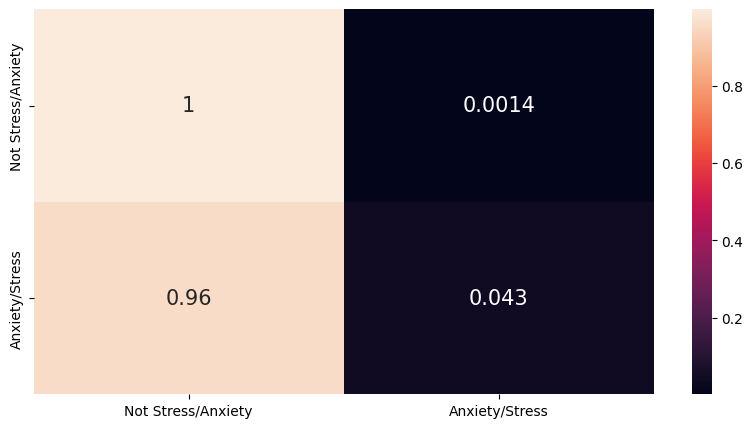

In [ ]:
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
conf_matrix = pd.DataFrame(matrix, index = ['Not Stress/Anxiety','Anxiety/Stress'],columns = ['Not Stress/Anxiety','Anxiety/Stress'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [ ]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 40))
model1.add(layers.LSTM(40,dropout=0.5))
model1.add(layers.Dense(1,activation='sigmoid'))

model1.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs=7,validation_data=(X_test, y_test))

Epoch 1/7
168/168 [==============================] - 43s 238ms/step - loss: 0.4429 - accuracy: 0.8225 - val_loss: 0.3217 - val_accuracy: 0.8752
Epoch 2/7
168/168 [==============================] - 38s 224ms/step - loss: 0.2267 - accuracy: 0.9203 - val_loss: 0.1832 - val_accuracy: 0.9401
Epoch 3/7
168/168 [==============================] - 39s 232ms/step - loss: 0.1439 - accuracy: 0.9528 - val_loss: 0.1235 - val_accuracy: 0.9564
Epoch 4/7
168/168 [==============================] - 41s 246ms/step - loss: 0.1199 - accuracy: 0.9571 - val_loss: 0.1662 - val_accuracy: 0.9407
Epoch 5/7
168/168 [==============================] - 40s 240ms/step - loss: 0.1055 - accuracy: 0.9647 - val_loss: 0.1258 - val_accuracy: 0.9496
Epoch 6/7
168/168 [==============================] - 38s 226ms/step - loss: 0.0891 - accuracy: 0.9707 - val_loss: 0.1624 - val_accuracy: 0.9446
Epoch 7/7
168/168 [==============================] - 39s 234ms/step - loss: 0.0826 - accuracy: 0.9744 - val_loss: 0.1222 - val_accuracy:

In [ ]:
test_loss, test_acc = model1.evaluate(X_test,  y_test, verbose=2)
print('Model accuracy: ',test_acc)


56/56 - 2s - loss: 0.1222 - accuracy: 0.9530 - 2s/epoch - 35ms/step
Model accuracy:  0.9529938697814941


In [ ]:
y_pred = model1.predict(X_test)

56/56 [==============================] - 3s 38ms/step


<ipython-input-62-eeceb24613bf>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


<Axes: >

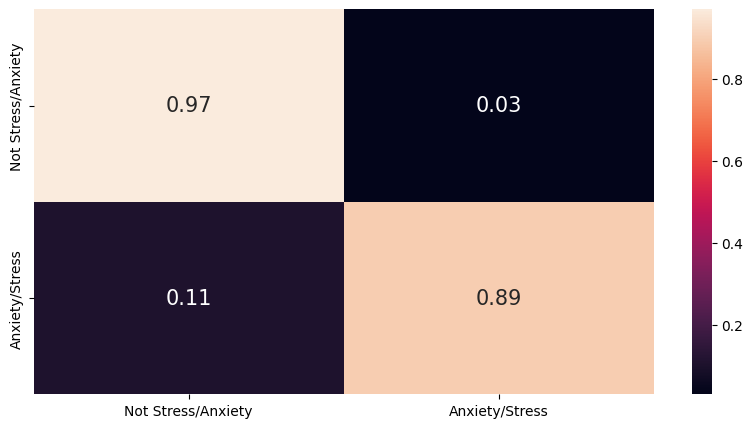

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Not Stress/Anxiety','Anxiety/Stress'],columns = ['Not Stress/Anxiety','Anxiety/Stress'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [ ]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40))
model2.add(layers.LSTM(40,dropout=0.5,return_sequences=True))
model2.add(layers.LSTM(40,dropout=0.5))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
168/168 [==============================] - 82s 454ms/step - loss: 0.4173 - accuracy: 0.8289 - val_loss: 0.3587 - val_accuracy: 0.8411
Epoch 2/5
168/168 [==============================] - 75s 444ms/step - loss: 0.2156 - accuracy: 0.9207 - val_loss: 0.1461 - val_accuracy: 0.9407
Epoch 3/5
168/168 [==============================] - 76s 450ms/step - loss: 0.1484 - accuracy: 0.9515 - val_loss: 0.3520 - val_accuracy: 0.9043
Epoch 4/5
168/168 [==============================] - 80s 473ms/step - loss: 0.1204 - accuracy: 0.9565 - val_loss: 0.1252 - val_accuracy: 0.9536
Epoch 5/5
168/168 [==============================] - 76s 452ms/step - loss: 0.0917 - accuracy: 0.9655 - val_loss: 0.1145 - val_accuracy: 0.9569


In [ ]:
test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)
print('Model accuracy: ',test_acc)

56/56 - 5s - loss: 0.1145 - accuracy: 0.9569 - 5s/epoch - 98ms/step
Model accuracy:  0.956911027431488


In [ ]:
y_pred = model2.predict(X_test)

56/56 [==============================] - 6s 83ms/step


<ipython-input-66-971a35a34b0f>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


<Axes: >

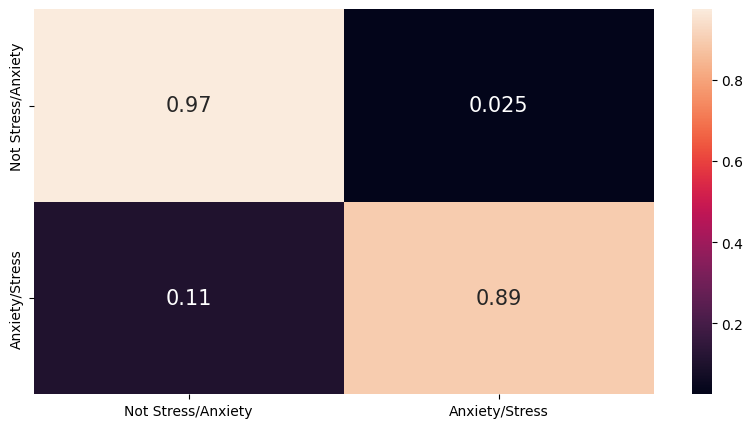

In [ ]:
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
conf_matrix = pd.DataFrame(matrix, index = ['Not Stress/Anxiety','Anxiety/Stress'],columns = ['Not Stress/Anxiety','Anxiety/Stress'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [ ]:
model3 = Sequential()
model3.add(layers.Embedding(max_words, 40))
model3.add(layers.Bidirectional(layers.LSTM(40,dropout=0.5)))
model3.add(layers.Dense(1,activation='sigmoid'))

model3.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, y_train, epochs=8,validation_data=(X_test, y_test))

Epoch 1/8
168/168 [==============================] - 74s 412ms/step - loss: 0.4548 - accuracy: 0.8037 - val_loss: 0.3401 - val_accuracy: 0.8707
Epoch 2/8
168/168 [==============================] - 67s 400ms/step - loss: 0.2511 - accuracy: 0.9117 - val_loss: 0.1548 - val_accuracy: 0.9502
Epoch 3/8
168/168 [==============================] - 66s 396ms/step - loss: 0.1585 - accuracy: 0.9472 - val_loss: 0.1260 - val_accuracy: 0.9575
Epoch 4/8
168/168 [==============================] - 68s 404ms/step - loss: 0.1328 - accuracy: 0.9532 - val_loss: 0.1211 - val_accuracy: 0.9564
Epoch 5/8
168/168 [==============================] - 67s 397ms/step - loss: 0.1098 - accuracy: 0.9636 - val_loss: 0.1309 - val_accuracy: 0.9502
Epoch 6/8
168/168 [==============================] - 65s 386ms/step - loss: 0.1031 - accuracy: 0.9657 - val_loss: 0.1119 - val_accuracy: 0.9580
Epoch 7/8
168/168 [==============================] - 68s 405ms/step - loss: 0.0800 - accuracy: 0.9696 - val_loss: 0.1451 - val_accuracy:

In [ ]:
test_loss, test_acc = model3.evaluate(X_test,  y_test, verbose=2)
print('Model accuracy: ',test_acc)

56/56 - 5s - loss: 0.1594 - accuracy: 0.9496 - 5s/epoch - 83ms/step
Model accuracy:  0.9496362805366516


In [ ]:
y_pred = model3.predict(X_test)

56/56 [==============================] - 4s 64ms/step


<ipython-input-70-971a35a34b0f>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


<Axes: >

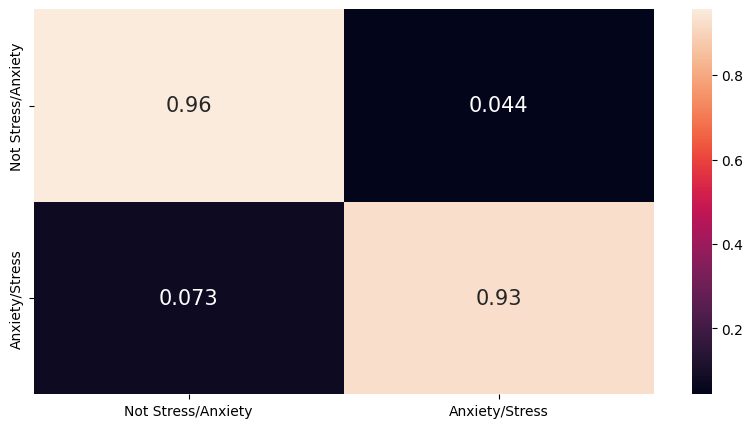

In [ ]:
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
conf_matrix = pd.DataFrame(matrix, index = ['Not Stress/Anxiety','Anxiety/Stress'],columns = ['Not Stress/Anxiety','Anxiety/Stress'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [ ]:
from keras.models import load_model

model3.save('model.h5')

In [ ]:
model = load_model('model.h5')

In [ ]:
import os
os.listdir('/content/drive/MyDrive/Tweets_data')[:5]

['0327_1.csv', '0324_3.csv', '0317_4.csv', '0324_4.csv', '0327_5.csv']

In [ ]:
tweets = pd.read_csv('/content/drive/MyDrive/Tweets_data/0314_1.csv')
tweets.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2020-03-14 23:55:21,AlbertoxVazquez,NaN,0,1,5,Bout to depression buy these OnlyFans while I’...,NaN,NaN,NaN,1238977045230739460,https://twitter.com/AlbertoxVazquez/status/123...
1,2020-03-14 23:54:45,TheOGKennedy,NaN,6,2,63,Pretty lucky for me how we ended up in the onl...,NaN,NaN,NaN,1238976896160772096,https://twitter.com/TheOGKennedy/status/123897...
2,2020-03-14 23:45:58,megmarie5,NaN,0,0,0,@ariana2525 I myself suffered & still suffer. ...,NaN,@ariana2525,NaN,1238974685015990273,https://twitter.com/megmarie5/status/123897468...
3,2020-03-14 23:43:10,BoozyBillsBabe,NaN,13,0,39,Second full day of self-quarantine and I am ju...,NaN,NaN,NaN,1238973978963836928,https://twitter.com/BoozyBillsBabe/status/1238...
4,2020-03-14 23:42:39,megmarie5,NaN,0,0,1,I’m behind on @VanderpumpRules and binge watch...,NaN,@VanderpumpRules @ariana2525,NaN,1238973850227884032,https://twitter.com/megmarie5/status/123897385...


In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Tweets_data'):
    for filename in filenames:
        if filename!='0314_1.csv':
            temp = pd.read_csv(os.path.join(dirname, filename))
            tweets = pd.concat([tweets, temp], ignore_index=True)

In [ ]:
tweets.shape

(25425, 12)

In [ ]:
tweets.sort_values(by=['date'],inplace=True)
tweets.reset_index(drop=True,inplace=True)
tweets = tweets[['date','text']]

In [ ]:
tweets_dataset = tweets.copy()
tweets.head()

,date,text
0,2020-03-14 00:04:13,Damn just remembered this front bottoms show i...
1,2020-03-14 00:07:19,"hapless Dementia joe will lose to Trump, even ..."
2,2020-03-14 00:07:52,it's making me anxious lol
3,2020-03-14 00:08:46,I’m so glad my depression kicked in I’m going ...
4,2020-03-14 00:11:16,Have some wine . You’ll feel less anxious.


In [ ]:
#Removing non-ascii characters (for example, arabian chars)
tweets.text.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
#Making all fields string type
for i in range(len(tweets)):
  tweets.at[i,'text'] = str(tweets.iloc[i]['text'])
#Removing URLs
for i in range(len(tweets)):
  tweets.at[i,'text'] = remove_urls(tweets.iloc[i]['text'])
# Convert to list
data = tweets.text.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [ ]:
data = np.array(data)
data[:10]

array(['Damn just remembered this front bottoms show is about to cure my depression',
       'hapless Dementia joe will lose to Trump, even if the economy craters into a full on depression & covid19 kills millions of people. Second you cannot expect to conduct an unfair, corrupt & illegitimate primary & expect people to fall in line. I voted for Hillary last time no mas.',
       'its making me anxious lol',
       'Im so glad my depression kicked in Im going to BED',
       'Have some wine . Youll feel less anxious.',
       'Everyone be patient. Messages blowing up. I know yall are anxious to bet something. I am doing mini write ups on each of the 6 games, because I want to be clear Im not just picking games for fucks sake. Theres a method to my madness. Once you pay, hang tight! Thank you!',
       'Cant wait to tell my kids about the toilet paper depression of 2020',
       'I think in order to keep sick hourly workers home, and to support people who cant work from home but have ki

In [ ]:
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[    0     0     0 ...   771     7    12]
 [    0     0     0 ...    44    68  5085]
 [    0     0     0 ...    16    20   206]
 ...
 [    0     0     0 ...   289  1400   289]
 [    0     0     0 ...    36    37 13036]
 [    0     0     0 ...    36    37 13036]]


In [ ]:
predictions = model3.predict(tweets)

795/795 [==============================] - 64s 80ms/step


In [ ]:
np.around(predictions, decimals=0)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
tweets_dataset['label'] = np.around(predictions, decimals=0)
tweets_dataset[tweets_dataset['label']==1.0].head(10)

,date,text,label
20,2020-03-14 00:30:22,that could kill your grandparents if you're no...,1.0
21,2020-03-14 00:33:07,this is gonna make me sound insufferable but m...,1.0
40,2020-03-14 00:50:59,I should NOT have come to the grocery store. N...,1.0
66,2020-03-14 01:05:59,I keep my depression at bay by keeping so busy...,1.0
70,2020-03-14 01:08:04,We sure do need the tested team rn to keep our...,1.0
79,2020-03-14 01:14:32,This feels nothing like 9/11 to me. I was defi...,1.0
86,2020-03-14 01:17:42,I will not isolate myself due to this virus. I...,1.0
87,2020-03-14 01:17:42,I will not isolate myself due to this virus. I...,1.0
101,2020-03-14 01:25:31,"Please people, keep the replies and venting DM...",1.0
103,2020-03-14 01:26:00,Pray for us working in healthcare right now......,1.0


In [ ]:
for i in range(10):
    print(tweets_dataset.iloc[i*2]['text'])
    print('\n')

Damn just remembered this front bottoms show is about to cure my depression


it's making me anxious lol


Have some wine . You’ll feel less anxious.


Can’t wait to tell my kids about the toilet paper depression of 2020


<——— anxious bunny https://twitter.com/GlennonDoyle/status/1238449159168053250 …


And here we are the Great Depression of toilet paper


Depression is knocking at the door #Tougaloo_RYS20 #Jackson_RYS20https://twitter.com/UnderRatedTim/status/1238589018662715392 …


Take me back! Kind of been in a slight depression since being home. With all this virus crap, it’s making it worse! Kind of hard to return to normal life when people think the world is ending @Atlantis Bahamas https://www.instagram.com/p/B9sZ6Q9HmL-/?igshid=kku0lw1dwunw …


Take me back! Kind of been in a slight depression since being home. With all this virus crap, it’s making it worse! Kind of hard to return to normal life when people think the world is ending @Atlantis Bahamas https://www.instagram.co